In [1]:
import numpy as np
import pandas as pd

## Dataset for crimes in Chigago

Field Description:
* ID: a unique identifier for each observation
* Date: the date the crime occurred
* LocationDescription: the location where the crime occurred
* Arrest: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made)
* Domestic: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic)
* Beat: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.
* District: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.
* CommunityArea: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.
* Year: the year in which the crime occurred.
* Latitude: the latitude of the location at which the crime occurred.
* Longitude: the longitude of the location at which the crime occurred.

In [6]:
df = pd.read_csv('https://courses.edx.org/c4x/MITx/15.071x_2/asset/mvtWeek1.csv')

In [19]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012,41.756284,-87.621645
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012,41.837568,-87.621761


#### Questions
How many rows of data (observations) are in this dataset?

How many variables are in this dataset?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 11 columns):
ID                     191641 non-null int64
Date                   191641 non-null object
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
District               148589 non-null object
CommunityArea          167038 non-null object
Year                   191641 non-null int64
Latitude               189365 non-null float64
Longitude              189365 non-null float64
dtypes: bool(2), float64(2), int64(3), object(4)
memory usage: 13.5+ MB


#### Questions

Using the "max" function, what is the maximum value of the variable "ID"?

What is the minimum value of the variable "Beat"?

In [11]:
df.describe()

,ID,Beat,Year,Latitude,Longitude
count,1.916410e+05,191641.000000,191641.000000,189365.000000,189365.000000
mean,4.968629e+06,1258.810771,2006.134940,41.844555,-87.677782
std,2.342997e+06,702.530465,3.520285,0.085583,0.057333
min,1.310022e+06,111.000000,2001.000000,41.644710,-87.925510
25%,2.832144e+06,722.000000,2003.000000,41.771618,-87.718474
50%,4.762956e+06,1121.000000,2006.000000,41.850029,-87.677597
75%,7.201878e+06,1733.000000,2009.000000,41.917116,-87.635513
max,9.181151e+06,2535.000000,2012.000000,42.022878,-87.524676


In [12]:
# or using
print('ID Max {}'.format(df.ID.max()))
print('Beat Min {}'.format(df.Beat.min()))

ID Max 9181151
Beat Min 111


#### Questions

How many observations have value TRUE in the Arrest variable (this is the number of crimes for which an arrest was made)?



In [14]:
df.Arrest.value_counts()

False    176105
True      15536
Name: Arrest, dtype: int64

#### Questions

How many observations have a LocationDescription value of ALLEY?

In [17]:
df.LocationDescription.value_counts()['ALLEY']

2308

#### Questions

In what format are the entries in the variable Date?

In [20]:
#Month/Day/Year Hour:Minute

#### Questions

What is the month and year of the median date in our dataset?

In [27]:
# Convert date to date type
df.Date = pd.to_datetime(df.Date, format='%m/%d/%y %H:%M')

In [29]:
# Check data format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 11 columns):
ID                     191641 non-null int64
Date                   191641 non-null datetime64[ns]
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
District               148589 non-null object
CommunityArea          167038 non-null object
Year                   191641 non-null int64
Latitude               189365 non-null float64
Longitude              189365 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 13.5+ MB


In [37]:
# Evaluate the quantiles
df.Date.quantile(.5)

Timestamp('2006-05-21 12:30:00')

#### Question

In which month did the fewest motor vehicle thefts occur?

In [75]:
df['Month'] = df.Date.dt.month
df['Weekday'] = df.Date.dt.weekday_name

In [76]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,Weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,41.756284,-87.621645,12,Monday
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303,12,Monday
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670,12,Monday
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726,12,Monday
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,41.837568,-87.621761,12,Monday


In [81]:
counts = df.Month.value_counts()
counts.idxmin()

2

#### Question

On which weekday did the most motor vehicle thefts occur?

In [78]:
df.Weekday.value_counts().idxmax()

'Friday'

#### Question

Which month has the largest number of motor vehicle thefts for which an arrest was made?

In [103]:
grouped = df.groupby(['Arrest', 'Month'])
grouped.count()

ID   Date  LocationDescription  Domestic   Beat  District  \
Arrest Month                                                                 
False  1      14612  14612                14612     14612  14612     10825   
       2      12273  12273                12273     12273  12273      9096   
       3      14460  14460                14460     14460  14460     11029   
       4      14028  14028                14028     14028  14028     10980   
       5      14848  14848                14848     14848  14848     11794   
       6      14772  14772                14772     14772  14772     11732   
       7      15477  15477                15477     15477  15477     12150   
       8      15243  15243                15243     15243  15243     12090   
       9      14812  14812                14812     14812  14812     11632   
       10     15744  15744                15744     15744  15744     12210   
       11     14807  14807                14807     14807  14807     11836   
       12     15029  15029                15029     15029  15029     12329   
True   1       1435   1435                 1435      1435   1435       924   
       2       1238   1238                 1238      1238   1238       765   
       3       1298   1298                 1298      1298   1298       880   
       4       1252   1252                 1252      1252   1252       903   
       5       1187   1187                 1187      1187   1187       867   
       6       1230   1230                 1230      1230   1230       926   
       7       1324   1324                 1324      1324   1324       954   
       8       1329   1329                 1329      1329   1329       964   
       9       1248   1248                 1248      1248   1248       884   
       10      1342   1342                 1342      1342   1342       911   
       11      1256   1256                 1256      1256   1256       904   
       12      1397   1397                 1397      1397   1397      1004   

              CommunityArea   Year  Latitude  Longitude  Weekday  
Arrest Month                                                      
False  1              11983  14612     14539      14539    14612  
       2              10085  12273     12177      12177    12273  
       3              12065  14460     14359      14359    14460  
       4              12211  14028     13917      13917    14028  
       5              13503  14848     14756      14756    14848  
       6              13291  14772     14684      14684    14772  
       7              13775  15477     15347      15347    15477  
       8              13689  15243     15105      15105    15243  
       9              13086  14812     14642      14642    14812  
       10             13741  15744     15333      15333    15744  
       11             13220  14807     14233      14233    14807  
       12             13579  15029     14919      14919    15029  
True   1               1077   1435      1432       1432     1435  
       2                895   1238      1226       1226     1238  
       3                980   1298      1289       1289     1298  
       4               1036   1252      1240       1240     1252  
       5               1059   1187      1184       1184     1187  
       6               1078   1230      1227       1227     1230  
       7               1113   1324      1313       1313     1324  
       8               1144   1329      1320       1320     1329  
       9               1061   1248      1236       1236     1248  
       10              1113   1342      1315       1315     1342  
       11              1075   1256      1181       1181     1256  
       12              1179   1397      1391       1391     1397

In [ ]:
grouped.count().loc[True].ID.idxmax()

#### Question

In general, does it look like crime increases or decreases from 2002 - 2012?

In general, does it look like crime increases or decreases from 2005 - 2008?

In general, does it look like crime increases or decreases from 2009 - 2011?

In [125]:
df.groupby([df["Date"].dt.year]).count()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,Weekday
Date,,,,,,,,,,,,,
2001,20669,20669,20669,20669,20669,20669,122,586,20669,20479,20479,20669,20669
2002,18753,18753,18753,18753,18753,18753,494,14236,18753,17274,17274,18753,18753
2003,16657,16657,16657,16657,16657,16657,12977,16657,16657,16615,16615,16657,16657
2004,16862,16862,16862,16862,16862,16862,16824,16861,16862,16826,16826,16862,16862
2005,16484,16484,16484,16484,16484,16484,16403,16484,16484,16403,16403,16484,16484
2006,16098,16098,16098,16098,16098,16098,16069,16097,16098,16069,16069,16098,16098
2007,14280,14280,14280,14280,14280,14280,14271,14280,14280,14271,14271,14280,14280
2008,14445,14445,14445,14445,14445,14445,14280,14445,14445,14281,14281,14445,14445
2009,12167,12167,12167,12167,12167,12167,12040,12166,12167,12042,12042,12167,12167


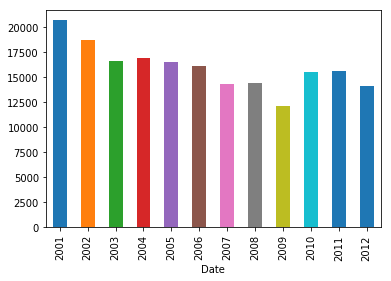

In [124]:
df.groupby([df["Date"].dt.year]).count().Date.plot(kind='bar')

#### Question

Does it look like there were more crimes for which arrests were made in the first half of the time period or the second half of the time period? (Note that the time period is from 2001 to 2012, so the middle of the time period is the beginning of 2007.)

In [182]:
# Evaluate the quantiles
df.Date.quantile(.5)

Timestamp('2006-05-21 12:30:00')

*Answer: First Half*

In [184]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,Weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,41.756284,-87.621645,12,Monday
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303,12,Monday
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670,12,Monday
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726,12,Monday
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,41.837568,-87.621761,12,Monday


#### Question

For what proportion of motor vehicle thefts in 2001 was an arrest made?

In [220]:
arest_year = df.groupby(["Year", "Arrest"]).count()
arest_year.head()

ID   Date  LocationDescription  Domestic   Beat  District  \
Year Arrest                                                                 
2001 False   18517  18517                18517     18517  18517       119   
     True     2152   2152                 2152      2152   2152         3   
2002 False   16638  16638                16638     16638  16638       471   
     True     2115   2115                 2115      2115   2115        23   
2003 False   14859  14859                14859     14859  14859     11562   

             CommunityArea  Latitude  Longitude  Month  Weekday  
Year Arrest                                                      
2001 False             550     18336      18336  18517    18517  
     True               36      2143       2143   2152     2152  
2002 False           12730     15304      15304  16638    16638  
     True             1506      1970       1970   2115     2115  
2003 False           14859     14820      14820  14859    14859

In [204]:
arest_year.loc[2001]

,ID,Date,LocationDescription,Domestic,Beat,District,CommunityArea,Latitude,Longitude,Month,Weekday
Arrest,,,,,,,,,,,
False,18517,18517,18517,18517,18517,119,550,18336,18336,18517,18517
True,2152,2152,2152,2152,2152,3,36,2143,2143,2152,2152


In [214]:
arest_year.loc[2001].apply(lambda x: x/x.sum())

,ID,Date,LocationDescription,Domestic,Beat,District,CommunityArea,Latitude,Longitude,Month,Weekday
Arrest,,,,,,,,,,,
False,0.895883,0.895883,0.895883,0.895883,0.895883,0.97541,0.938567,0.895356,0.895356,0.895883,0.895883
True,0.104117,0.104117,0.104117,0.104117,0.104117,0.02459,0.061433,0.104644,0.104644,0.104117,0.104117


In [215]:
arest_year.loc[2001].apply(lambda x: x/x.sum()).ID[True]

0.10411727708161982

#### Question

For what proportion of motor vehicle thefts in 2007 was an arrest made?

In [218]:
arest_year.loc[2007].apply(lambda x: x/x.sum()).ID[True]

0.084873949579831937

#### Question

For what proportion of motor vehicle thefts in 2012 was an arrest made?

In [219]:
arest_year.loc[2012].apply(lambda x: x/x.sum()).ID[True]

0.039029236446210619

#### Question

Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category? You should select 5 of the following options.

In [222]:
df.head()

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,Weekday
0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,41.756284,-87.621645,12,Monday
1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303,12,Monday
2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670,12,Monday
3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726,12,Monday
4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,41.837568,-87.621761,12,Monday


In [237]:
counting = df.groupby(['LocationDescription']).count()
counting.head()

,ID,Date,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,Weekday
LocationDescription,,,,,,,,,,,,
ABANDONED BUILDING,4,4,4,4,4,4,4,4,4,4,4,4
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,4,4,4,4,4,4,4,4,4,4,4,4
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,1,1,1,1,1,1,1,1,1,1,1,1
AIRPORT EXTERIOR - NON-SECURE AREA,24,24,24,24,24,24,24,24,24,24,24,24
AIRPORT EXTERIOR - SECURE AREA,1,1,1,1,1,1,1,1,1,1,1,1


In [242]:
counting.sort_values('ID',ascending=False).head(n=10)

,ID,Date,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,Weekday
LocationDescription,,,,,,,,,,,,
STREET,156564,156564,156564,156564,156564,122573,137204,156564,154761,154761,156564,156564
PARKING LOT/GARAGE(NON.RESID.),14852,14852,14852,14852,14852,10310,12151,14852,14620,14620,14852,14852
OTHER,4573,4573,4573,4573,4573,3270,3851,4573,4495,4495,4573,4573
ALLEY,2308,2308,2308,2308,2308,1688,1980,2308,2285,2285,2308,2308
GAS STATION,2111,2111,2111,2111,2111,1584,1816,2111,2084,2084,2111,2111
DRIVEWAY - RESIDENTIAL,1675,1675,1675,1675,1675,1371,1512,1675,1661,1661,1675,1675
RESIDENTIAL YARD (FRONT/BACK),1536,1536,1536,1536,1536,1507,1534,1536,1529,1529,1536,1536
RESIDENCE,1302,1302,1302,1302,1302,1000,1114,1302,1293,1293,1302,1302
RESIDENCE-GARAGE,1176,1176,1176,1176,1176,965,1050,1176,1160,1160,1176,1176
